Step 02:

KNN Classifier:
1. Import data set
2. Seperate x and y (y=Gender)
3. Train = 70%, Test = 30%
4. Apply KNN Classifier 
5. Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)
6. Apply KNN Classifier: 

Tuning:
1. Apply Randomized Search CV to select best K vlaue
2. Compare accuracy with default KNN and After tuning K value
3. Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report) and Compare with Old KNN model


In [1]:
#Load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
#Load dataset
dataset=pd.read_csv("weight-height.csv")
df=dataset.copy()
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
# Checking the missing value
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

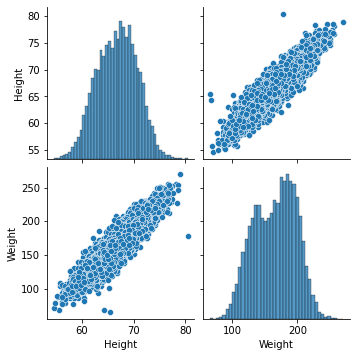

In [4]:
#data visualization using seaborn library 
sns.pairplot(df[['Gender','Height','Weight']])
plt.show()

In [5]:
# Label_Encoding_Techniques:¶
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
df.Gender = label.fit_transform(df['Gender'])

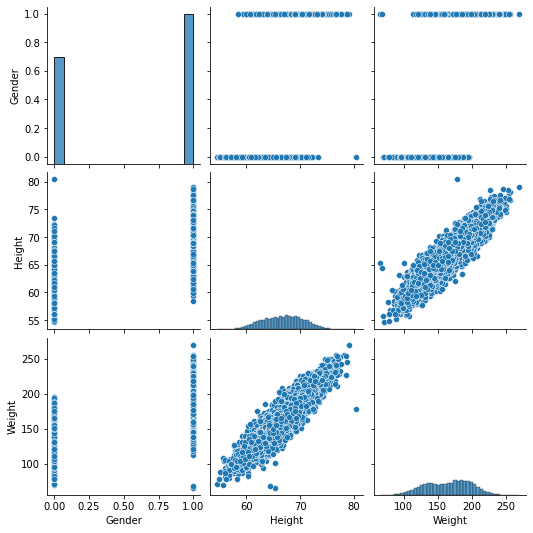

In [6]:
#data visualization using seaborn library after encoding 
sns.pairplot(df[['Gender','Height','Weight']])
plt.show()

In [7]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [8]:
df.Gender.unique()#1-male, 0-Female

array([1, 0])

In [9]:
# Separate dependent and Independent varibale
x=df.drop(['Gender'],axis=1)
y=df['Gender']

In [10]:
#Spliting dataset for training and testing purpose

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3,random_state=1) 

# KNN Classification model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors =2)
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
#print(predicted)
accuracy=model.score(xtest,ytest)
print("Accuracy for KNN classification:", round(accuracy,2)*100,'%')

Accuracy for KNN classification: 88.0 %


In [12]:
model.predict([[73.847017,241.893563]])

array([1])

classification_report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1055
           1       0.94      0.84      0.89      1512

    accuracy                           0.88      2567
   macro avg       0.87      0.88      0.88      2567
weighted avg       0.89      0.88      0.88      2567


Accuracy_score: 88.0 %


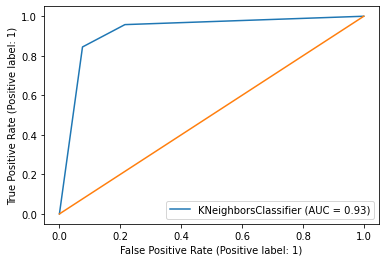

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,plot_roc_curve
print("classification_report:\n",classification_report(ytest,pred))
print()
print("Accuracy_score:", round(accuracy_score(ytest,pred),2)*100,'%')


plot_roc_curve(model,xtest,ytest)# plot ROC curve
plt.plot([0,1],[0,1])

confusion_matrix: 
 [[ 975   80]
 [ 235 1277]]



Text(0.5, 1.0, 'Confusion Matrix for Decission Tree')

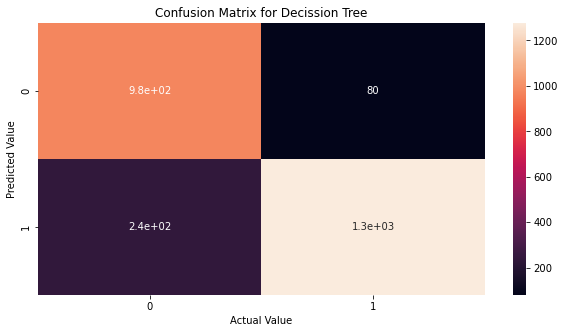

In [14]:
confusion_matrix=confusion_matrix(ytest,pred)
print("confusion_matrix: \n",confusion_matrix)
print()
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel('Actual Value')
plt.ylabel("Predicted Value")
plt.title("Confusion Matrix for Decission Tree")

# Discussion:I have got the 88% accuracy. 

Tuning:
1. Apply Randomized Search CV to select best K vlaue
2. Compare accuracy with default KNN and After tuning K value
3. Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report) and Compare with Old KNN model